In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philtpatton/source/repos/philpatton.github.io':
  os.chdir(r'/Users/philtpatton/source/repos/philpatton.github.io')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/7b/nb0vyhy90mdf30_65xwqzl300000gn/T/ipykernel_66608/2448382509.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/importlib/_bootstrap.py": 1733408734.471264, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/importlib/_bootstrap_external.py": 1733408734.4749234, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/zipimport.py": 1733408732.9002094, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/codecs.py": 1733408732.3210196, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/encodings/aliases.py": 1733408733.3980114, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/encodings/__init__.py": 1733408733.3914618, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/encodings/utf_8.py": 1733408733.9695811, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/abc.py": 1733408732.2604675, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/io.py": 1733408732.4908507, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/stat.py": 1733408732.7442944, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.12/_

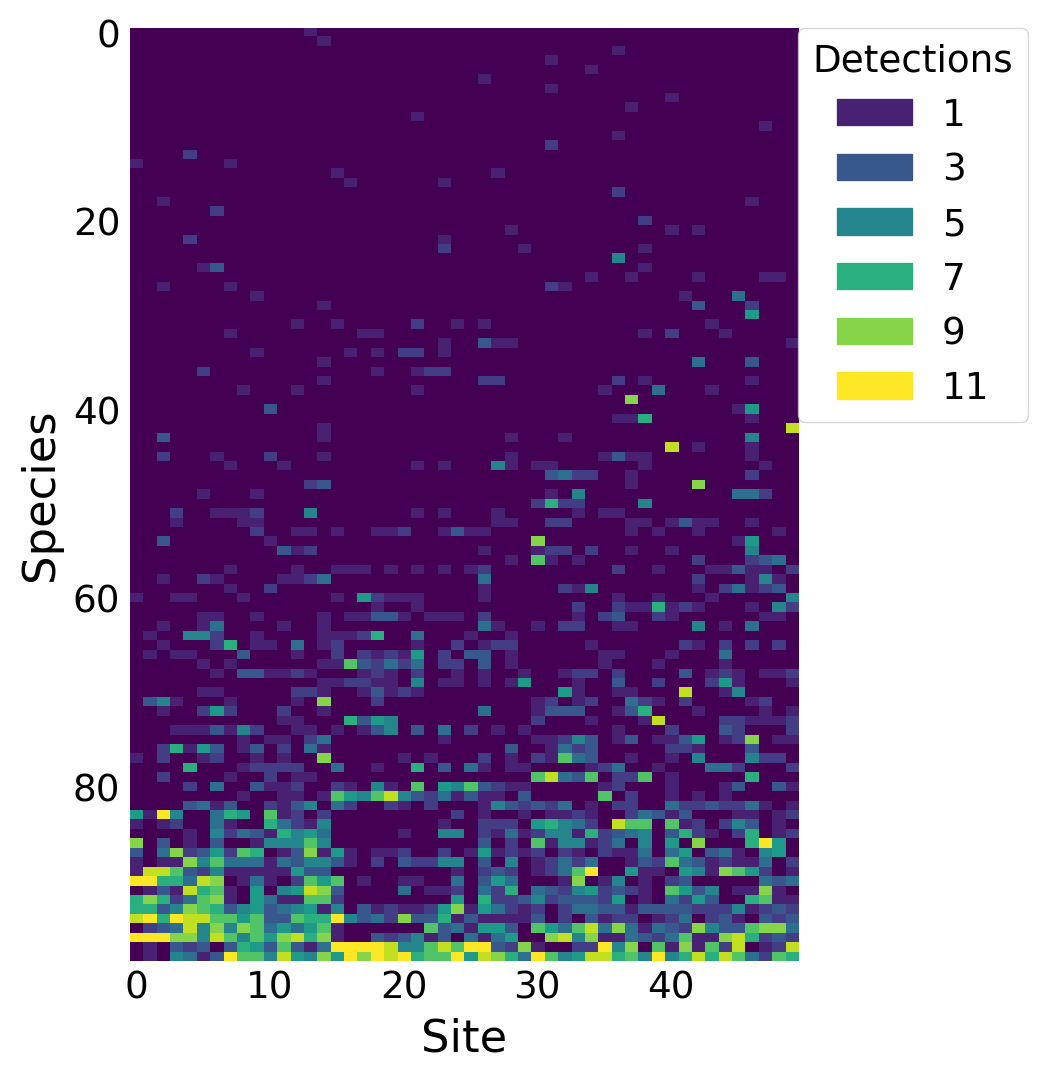

In [2]:
#| fig-cap: Number of detections for each species at each site along this BBS route.
#| label: fig-bbs

%config InlineBackend.figure_format = 'retina'

import seaborn as sns
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

SEED = 808
RNG = np.random.default_rng(SEED)

plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
sns.set_palette("tab10")

def invlogit(x):
    return 1 / (1 + np.exp(-x))

# read in the detection data
nh17 = pd.read_csv('detectionFreq.NH17.csv')
Y = nh17.to_numpy()
n, J = Y.shape
K = Y.max()

# convert the species names to ints 
species_idx, lookup = nh17.index.factorize() # lookup[int] returns the actual name

# plot the detection frequencies
fig, ax = plt.subplots(figsize=(4, 6))
im = ax.imshow(Y[np.argsort(Y.sum(axis=1))], aspect='auto')
ax.set_ylabel('Species')
ax.set_xlabel('Site')

# add a legend
values = np.unique(Y.ravel())[1::2]
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ Patch(color=colors[i], label=f'{v}') for i, v in enumerate(values) ]
plt.legend(title='Detections', handles=patches, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax.grid(False)
plt.show()

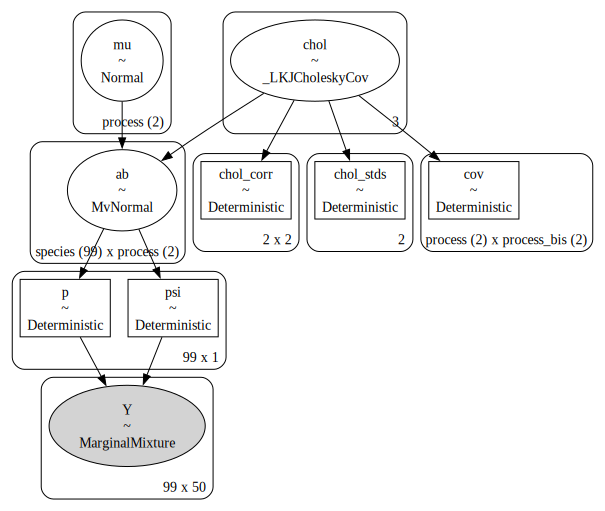

In [3]:
#| fig-cap: Visual representation of the known $N$ version of the community occupancy model.
#| label: fig-known

coords = {'process': ['detection', 'occurrence'], 
          'process_bis': ['detection', 'occurrence'],
          'species': lookup}

with pm.Model(coords=coords) as known:

    # priors for community-level means for detection and occurrence
    mu = pm.Normal('mu', 0, 2, dims='process')

    # prior for covariance matrix for occurrence and detection
    chol, corr, stds = pm.LKJCholeskyCov(
        "chol", n=2, eta=2.0, sd_dist=pm.Exponential.dist(1.0, shape=2)
    )
    cov = pm.Deterministic("cov", chol.dot(chol.T), dims=("process", "process_bis"))

    # species-level occurrence and detection probabilities on logit-scale  
    ab = pm.MvNormal("ab", mu, chol=chol, dims=("species", "process"))

    # probability of detection. newaxis allows for broadcasting
    a = ab[:, 0][:, np.newaxis]
    p = pm.Deterministic("p", pm.math.invlogit(a))

    # probability of detection. newaxis allows for broadcasting
    b = ab[:, 1][:, np.newaxis]
    psi = pm.Deterministic("psi", pm.math.invlogit(b))

    # likelihood
    pm.ZeroInflatedBinomial('Y', p=p, psi=psi, n=K, observed=Y)

pm.model_to_graphviz(known)

In [4]:
with known:
    # known_idata = pm.sample(nuts_sampler='nutpie')
    # known_idata = pm.sample(nuts_sampler='numpyro')
    known_idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu, chol, ab]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


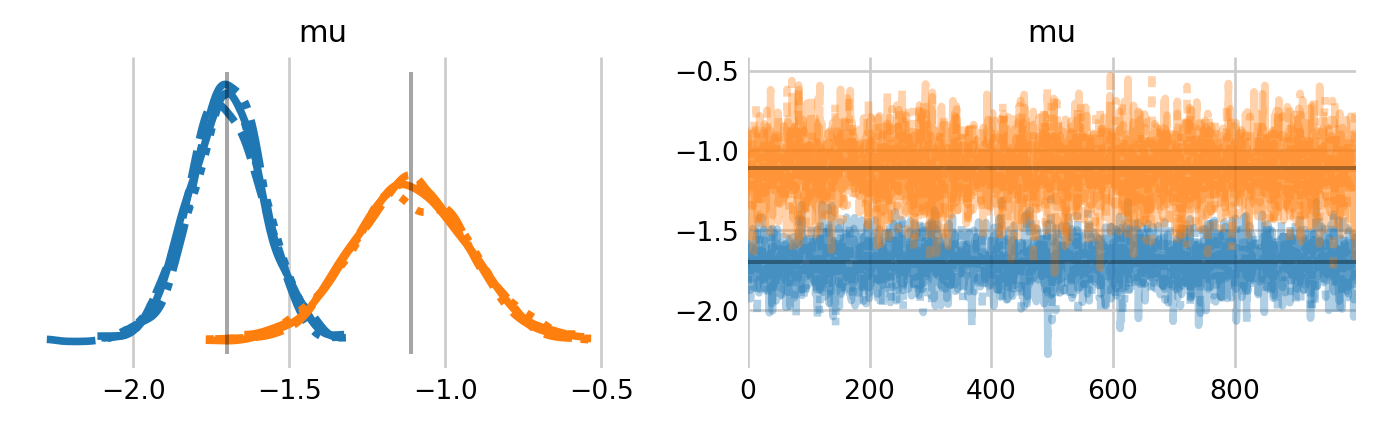

In [5]:
#| fig-cap: Trace plots for the community level means of occupancy and abundance in the known $N$ version of the BBS model. The estimates from @royle2008 are shown by vertical and horizontal lines.
#| label: fig-trace_known.
mu_hat_royle = [-1.11, -1.7]
az.plot_trace(known_idata, var_names=['mu'], figsize=(8,2),
              lines=[("mu", {}, [mu_hat_royle])]);

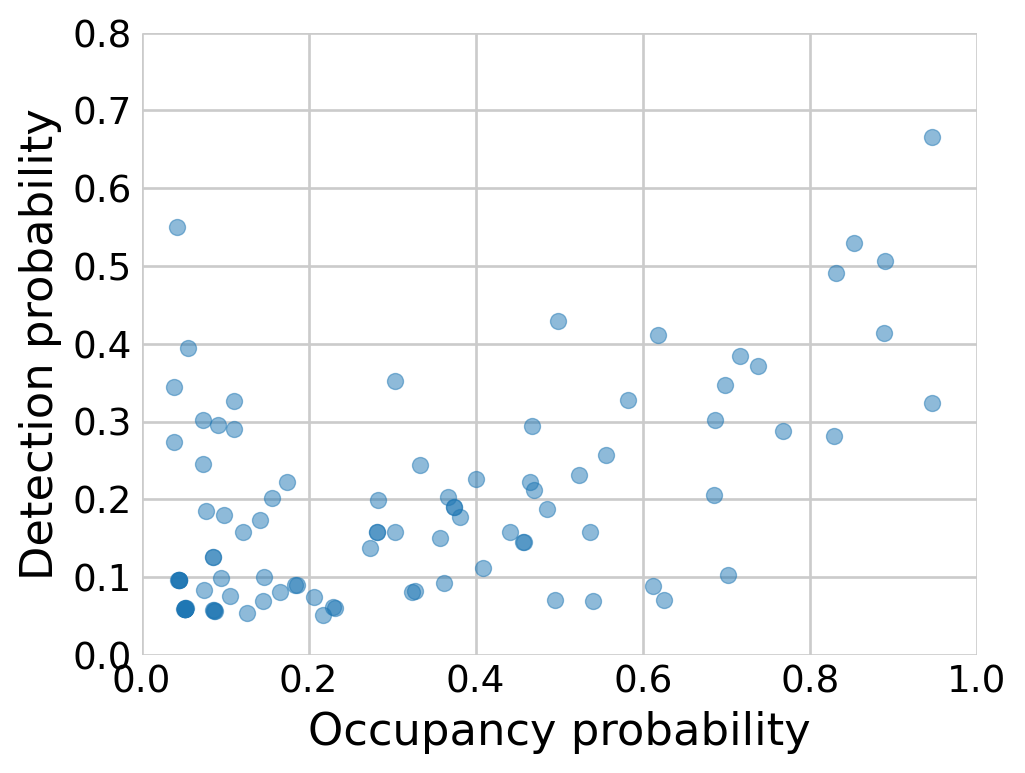

In [6]:
#| fig-cap: Species-level probabilities of detection and occupancy.
#| label: fig-probs
samps = az.extract(known_idata, var_names='ab')
ab_mean = samps.mean(axis=2)

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(invlogit(ab_mean[:, 1]), invlogit(ab_mean[:, 0]), alpha=0.5)
ax.set_xlim((0, 1))
ax.set_xlabel('Occupancy probability')
ax.set_ylim((0, 0.8))
ax.set_ylabel('Detection probability')
plt.show()

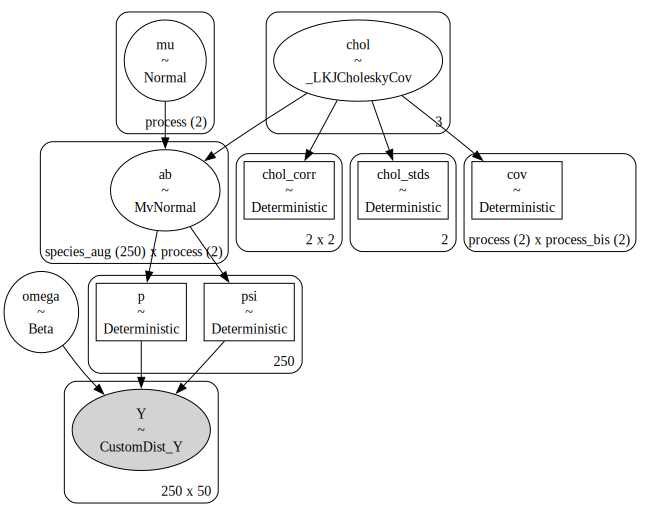

In [7]:
#| fig-cap: Visual representation of the unknown $N$ version of the BBS model.
#| label: fig-unknown
M = 250
all_zero_history = np.zeros((M - n, J))
Y_augmented = np.row_stack((Y, all_zero_history))

aug_names = [f'aug{i}' for i in np.arange(M - n)]
spp_aug = np.concatenate((lookup, aug_names))

coords = {'process': ['detection', 'occurrence'], 
          'process_bis': ['detection', 'occurrence'],
          'species_aug': spp_aug}

def logp(x, psi, n, p, omega):

    rv = pm.ZeroInflatedBinomial.dist(psi=psi, n=n, p=p)
    lp = pm.logp(rv, x)
    lp_sum = lp.sum(axis=1)
    lp_exp = pm.math.exp(lp_sum)
    
    res = pm.math.switch(
        x.sum(axis=1) > 0,
        lp_exp * omega,
        lp_exp * omega + (1 - omega)
    )
    
    return pm.math.log(res)

with pm.Model(coords=coords) as unknown:

    # priors for inclusion
    omega = pm.Beta('omega', 0.001, 1)
    
    # priors for community-level means for detection and occurrence
    mu = pm.Normal('mu', 0, 2, dims='process')

    # prior for covariance matrix for occurrence and detection
    chol, corr, stds = pm.LKJCholeskyCov(
        "chol", n=2, eta=2.0, sd_dist=pm.Exponential.dist(1.0, shape=2)
    )
    cov = pm.Deterministic("cov", chol.dot(chol.T), dims=("process", "process_bis"))

    # species-level occurrence and detection probabilities on logit-scale  
    ab = pm.MvNormal("ab", mu, chol=chol, dims=("species_aug", "process"))

    # probability of detection
    alpha = ab[:, 0]
    p = pm.Deterministic("p", pm.math.invlogit(alpha))

    # probability of occurrence
    beta = ab[:, 1]
    psi = pm.Deterministic("psi", pm.math.invlogit(beta))

    # likelihood
    pm.CustomDist(
        'Y',
        psi[:, np.newaxis],
        K,
        p[:, np.newaxis],
        omega,
        logp=logp,
        observed=Y_augmented
    )
    
pm.model_to_graphviz(unknown)

In [8]:
with unknown:
    # unknown_idata = pm.sample(nuts_sampler='nutpie')
    unknown_idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [omega, mu, chol, ab]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 82 seconds.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [9]:
az.summary(unknown_idata, var_names=['omega', 'cov', 'mu'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,0.526,0.069,0.401,0.653,0.004,0.003,362.0,549.0,1.01
"cov[detection, detection]",1.272,0.331,0.677,1.863,0.019,0.013,324.0,858.0,1.01
"cov[detection, occurrence]",1.409,0.490,0.583,2.329,0.027,0.019,347.0,575.0,1.02
"cov[occurrence, detection]",1.409,0.490,0.583,2.329,0.027,0.019,347.0,575.0,1.02
"cov[occurrence, occurrence]",5.012,1.347,2.810,7.554,0.075,0.053,327.0,668.0,1.01
mu[detection],-2.014,0.202,-2.409,-1.664,0.012,0.008,309.0,498.0,1.01
mu[occurrence],-2.039,0.451,-2.924,-1.241,0.027,0.019,294.0,512.0,1.01


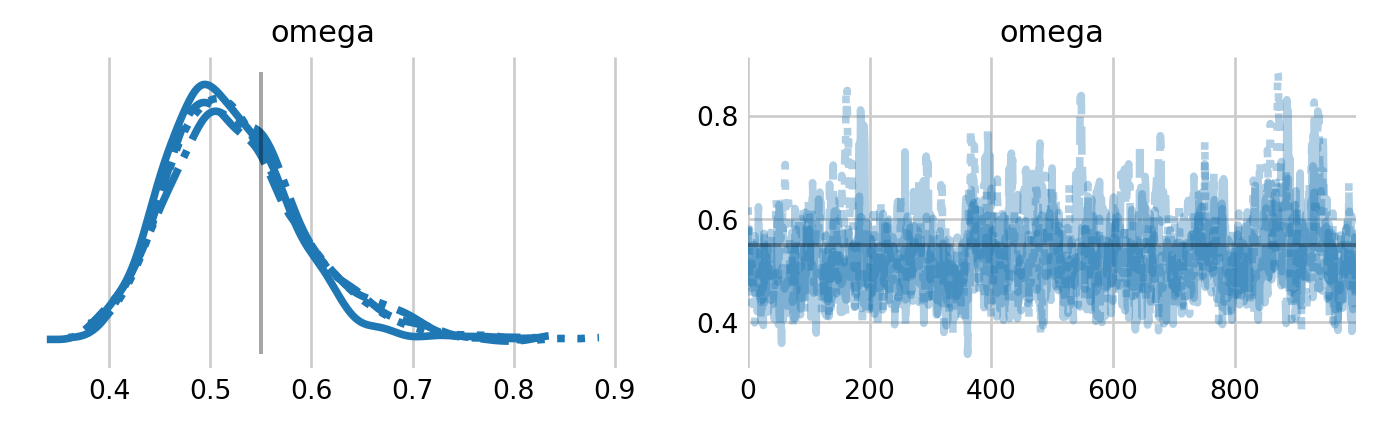

In [10]:
#| fig-cap: Trace plots for the inclusion parameter for the unknown $N$ version of the BBS model. The estimate from @royle2008 are shown by vertical and horizontal lines.
#| label: fig-trace_unknown.
omega_hat_royle = [0.55]
az.plot_trace(unknown_idata, var_names=['omega'], figsize=(8,2), 
              lines=[("omega", {}, [omega_hat_royle])]);

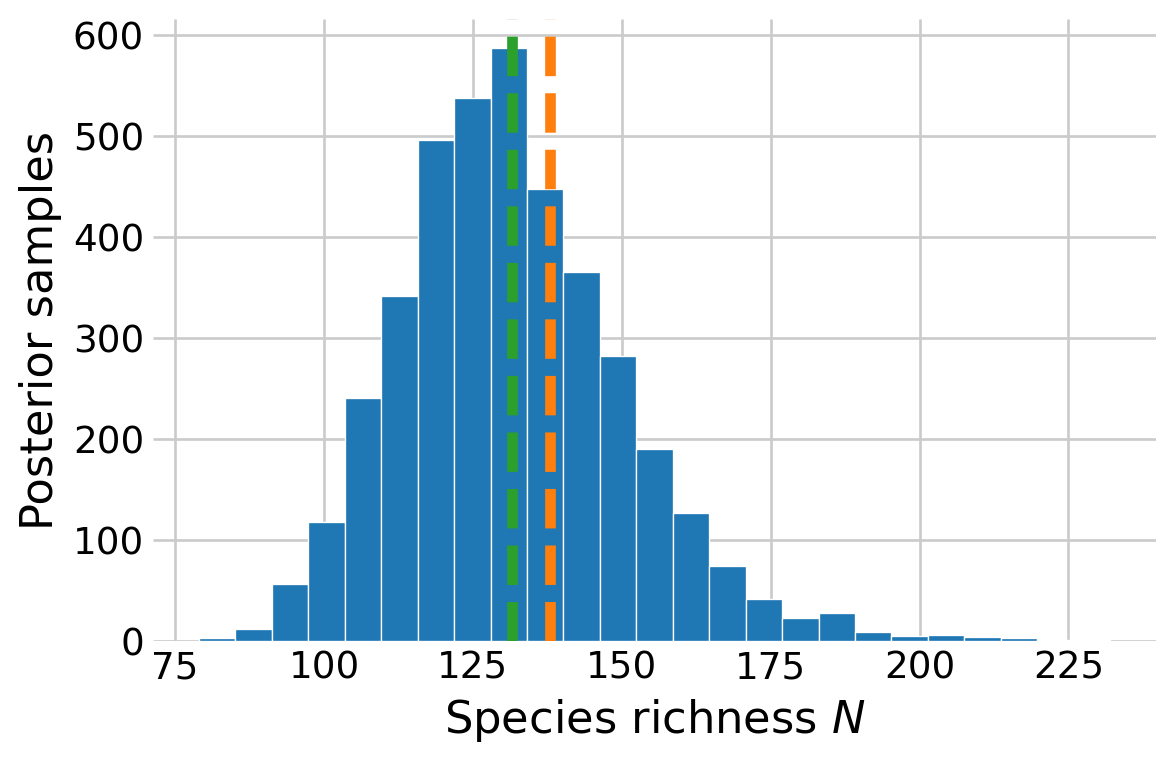

In [11]:
#| fig-cap: Posterior distribution of species richness from the BBS model.
#| label: fig-postN

# relevant posterior samples
post = az.extract(unknown_idata)
o_samps = post.omega.to_numpy()
psi_samps = post.psi.to_numpy()[n:, :]
p_samps = post.p.to_numpy()[n:, :]

# probability that the animal was never detected during the survey if present
p_not_detected = (1 - p_samps) ** K

# probability of a zero detection history 
p_zero_hist = psi_samps * p_not_detected + (1 - psi_samps)

# probability that the species was included in the given the all-zero history
p_included = (o_samps * p_zero_hist ** J) / (o_samps * p_zero_hist ** J + (1 - o_samps))

# posterior samples of N
number_undetected = RNG.binomial(1, p_included).sum(axis=0)
N_samps = n + number_undetected

N_samps = RNG.binomial(M, o_samps)

# posterior distribution 
N_hat_royle = 138
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(N_samps, edgecolor='white', bins=25)
ax.set_xlabel('Species richness $N$')
ax.set_ylabel('Posterior samples')
ax.axvline(N_hat_royle, linestyle='--', color='C1')
ax.axvline(N_samps.mean(), linestyle='--', color='C2')
plt.show()

In [12]:
%load_ext watermark

%watermark -n -u -v -iv -w  

Last updated: Thu Feb 13 2025

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.32.0

numpy     : 1.26.4
pandas    : 2.2.3
seaborn   : 0.13.2
arviz     : 0.20.0
pymc      : 5.20.1
matplotlib: 3.10.0

Watermark: 2.5.0

